#### Megan SIsson

In the Week 4 Exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from: Auto-mpg dataset. 

1. Load the data as a Pandas data frame and ensure that it imported correctly.
2. Begin by prepping the data for modeling:
-Remove the car name column.
-The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
-Create dummy variables for the origin column.

3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

6. Train an ordinary linear regression on the training data.

7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

C:\Users\mksis\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#1. Load the data as a Pandas data frame and ensure that it imported correctly.
df = pd.read_csv('/Users/mksis/Documents/Data Science/DSC550 Data Mining/Data Sets/auto-mpg.csv')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [3]:
#2. Begin by prepping the data for modeling:

#-Remove the car name column.
df = df.drop(columns = ['car name'])
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


In [4]:
#-The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
print(df.dtypes) #checking the df's data types
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')

print(df.dtypes)
df.head(3)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1


In [5]:
#-Create dummy variables for the origin column.

df = pd.get_dummies(df, columns = ['origin'])
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0


<AxesSubplot:>

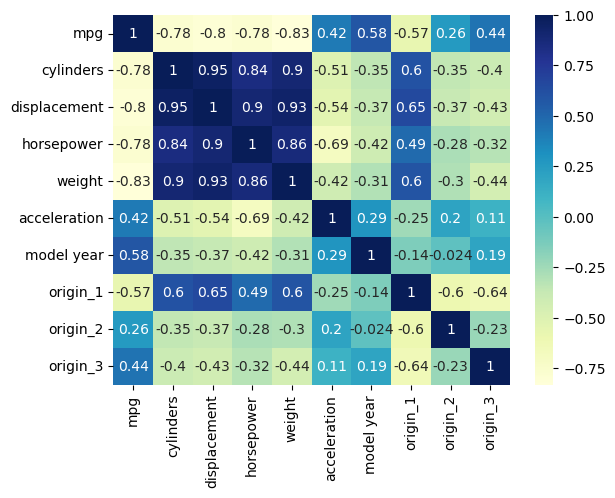

In [6]:
#3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

#print(df.corr()) #print the correlation coefficient for the different columns
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')

<AxesSubplot:xlabel='mpg', ylabel='weight'>

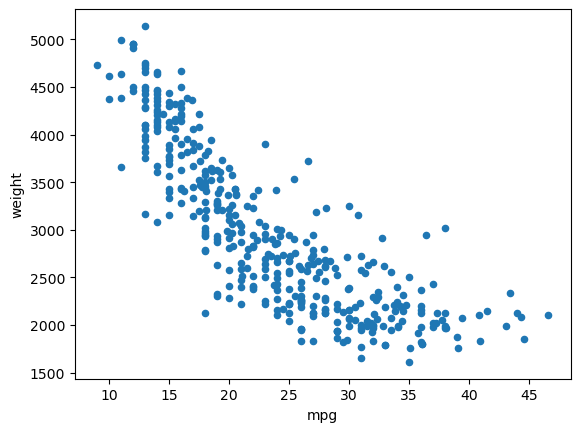

In [7]:
#4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.


df.plot.scatter(x = 'mpg', y = 'weight')
#This graph shows a negative correlation to mpg and weight. Meaning the heavier a vehicle is, the lower the mpg is.
#This makes sense with the -.78 correlation from the correlation matrix.

In [8]:
#5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

df = df.sample(frac = 1) #shuffle the data randomly

ratio = .8 #create ratio

total_rows = df.shape[0] #num of total rows for df
#print(total_rows)
train_size = int(total_rows * ratio) #num of rows of training data
#print(train_size)

train_df = df[0:train_size] #creating training data frame from rows 0-318
test_df = df[train_size:] #creating training data frame from rows 319-end

train_df.head()
test_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
322,46.6,4,86.0,65.0,2110,17.9,80,0,0,1
72,15.0,8,304.0,150.0,3892,12.5,72,1,0,0
191,22.0,6,225.0,100.0,3233,15.4,76,1,0,0
303,31.8,4,85.0,65.0,2020,19.2,79,0,0,1
205,28.0,4,97.0,75.0,2155,16.4,76,0,0,1


In [9]:
#6. Train an ordinary linear regression on the training data.

features_train = train_df['weight'].values.reshape(-1,1) #dependent variable is weight on training data
target_train = train_df['mpg'].values.reshape(-1,1) #independent variable is mpg on training data


features_test = test_df['weight'].values.reshape(-1,1) #reshaping dependent variable for test df, weight
target_test = test_df['mpg'].values.reshape(-1,1) #reshaping independent variable for test df, mpg

model = LinearRegression()


model.fit(features_train, target_train) #linear regression testing on the training model

target_pred = model.predict(features_test)



In [10]:
#7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

print('R2:', r2_score(target_test, target_pred)) #R2 of .62 means that more than 60% of change in mpg is explained by change in weight
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test,target_pred))) #measures average difference between values predicted
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))

R2: 0.7150770421405874
Root Mean Squared Error: 4.461033233218594
Mean Absolute Error: 3.289280584582734


In [11]:
#8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

from sklearn.linear_model import Lasso


In [12]:
#applying lasso regression on training data set

model_lasso = Lasso(alpha=1)
model_lasso.fit(features_train, target_train) #features as 'x' and target as 'y'
pred_train_lasso = model_lasso.predict(features_train)


#testing lasso regression
pred_test_lasso = model_lasso.predict(features_test)

In [13]:
print('R2:', r2_score(target_test, pred_test_lasso)) #R2 of .62 means more than 60% of change in mpg can be explained by change in weight
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test,pred_test_lasso))) #measures average difference between values predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, pred_test_lasso))

R2: 0.7150600241642862
Root Mean Squared Error: 4.461166456292009
Mean Absolute Error: 3.2892455905425764
